# Import necessary libraries to get data from API calls

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import time

In [10]:
# key regenerates every 48 hours, so don't need to hide it
key = 'RGAPI-9bc496ef-f3c3-4611-947f-5bc4faa88a4e'

# Need to pull in Challenger Players first to be able to get match histories later

In [11]:
challengers = 'https://na1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key={}'.format(key)

In [12]:
response = requests.get(challengers)

In [14]:
df = pd.DataFrame(response.json()['entries'])

In [15]:
df.tail()

,freshBlood,hotStreak,inactive,leaguePoints,losses,rank,summonerId,summonerName,veteran,wins
295,False,False,False,658,256,I,yTvnnMFvHkM-ZyPlecgt7d2C_AsGzTKRfYPnB85k3ETVXzg,XAXAXAXAXA,True,288
296,False,False,False,565,56,I,jDfDtOhvkPzzYwxryN-BrG6KkLHi5ncWAfXykJj2c4U5ezk,stuntopolis,False,99
297,False,False,False,1184,350,I,yiB_OmJz-glsnQk346bvus01kOBH-59OgIgb4p37ZkROhVU,unrequ1ted,True,437
298,False,False,False,529,374,I,hBLr58dCSp9xH1fnrzvH0DMVGMX7V97-9j2WSizcPXWfJbI,riste,False,409
299,False,True,False,562,303,I,qMS7aY0YsIgQ8RpOMpINBNsJ2rArwLOOPtH_KBprkVHnyXc,ToLoToLo,False,345


# EDA of the First API Call

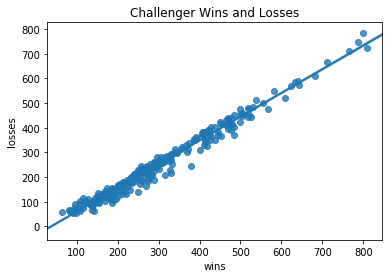

In [128]:
#Plotting the wins and losses for the players in the league
sns.regplot(df.wins, df.losses);
plt.title('Challenger Wins and Losses');

As one might expect, the Win/Loss Ratio seems to follow a line with a slope of < 1. This makes sense as players who win more in this league also equates to other players losing more. The players who lose get demoted to a tier below and are replaced by other players who win their games. Therefore, this league should be consistely filled with players having a positive win loss ratio

Text(0.5, 1.0, 'Number of Players who have played more than 100 games in Challenger')

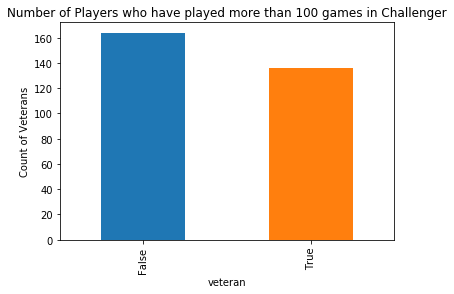

In [36]:
df.groupby('veteran').count()['losses'].plot(kind = 'bar')
plt.ylabel('Count of Veterans')
plt.title('Number of Players who have played more than 100 games in Challenger')

As one might expect, since the churn rate of players in challenger is so high, it would be difficult for players to maintain their rank as one of the best in the league for a long period of time. As such, the number of veterans, or players who have played more than 100 games in the league are less than the number of non veterans

In [37]:
df.describe()

,leaguePoints,losses,wins
count,300.000000,300.000000,300.000000
mean,708.466667,240.110000,286.996667
std,186.310334,139.119104,143.071245
min,435.000000,54.000000,65.000000
25%,569.000000,134.500000,181.750000
50%,649.500000,209.000000,257.500000
75%,804.250000,315.750000,373.250000
max,1604.000000,785.000000,808.000000


# Now that I have my 300 Challenger players, I need to use their summonerIDs to get their AccountIds. Once I obtain that, I can finally get their matchIDs and filter for Qiyana Games

In [38]:
summoner_ids = list(df.summonerId)

In [40]:
summoner_ids[0]

'xf6bsRp7IMuAh3saadVks59aJ1dZ603rWP8jYiJtlXghCeEF'

In [126]:
# Creating an empty list of account_ids to add to through continuous API calls from a for loop
account_ids = []

In [124]:
counter = 0
for summoners in summoner_ids:
    url = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/{}?api_key={}'.format(summoners, key)
    response = requests.get(url)
    account_ids.append(response.json()['accountId'])
    counter +=1
    if counter = 100:
        time.sleep(120)
        counter = 0